# Matplotlib

This notebook demonstrates how to use Python's `matplotlib` library to plot beautiful graphs.

# Plotting your first graph

First we need to import the `matplotlib` library.

In [1]:
import matplotlib

If `matplotlib` is not installed in your system, you can install it with the following command within Jupyter notebook

In [ ]:
!pip install matplotlib

Alternativelyy, you can install the library from the command prompt by typing:

```pip install matplotlib```

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc.  When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the `%matplotlib inline` magic command.

In [5]:
% matplotlib inline
# matplotlib.use("TKAgg")  # use this instead in your program if you want to use Tk as your graphics backend. (it opens a separate  window for each figure)

Now plotting a graph is as simple as calling the `plot` function with some data, and then calling the `show` function!

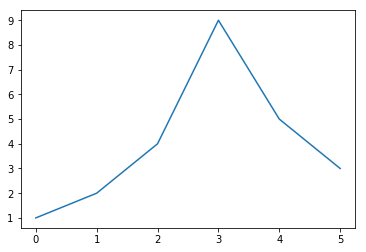

In [7]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

If the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.
You can also provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`:

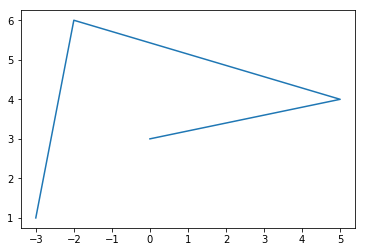

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` containing 500 floats ranging from -2 to 2, then we create a second array `y` computed as the square of `x` (to learn about NumPy, read the [NumPy tutorial](2 numpy.ipynb)).

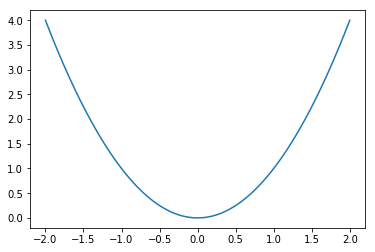

In [8]:
import numpy as np
x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

That's a bit dry, let's add a title, and x and y labels, and draw a grid.

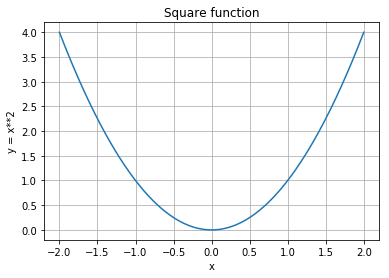

In [9]:
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

You can pass a 3rd argument to change the line's style and color.
For example `"g--"` means "green dashed line".

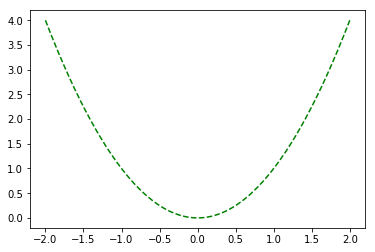

In [10]:
plt.plot(x, y,'g--')
plt.show()

You can plot multiple lines on one graph very simply: just pass `x1, y1, [style1], x2, y2, [style2], ...`

For example:

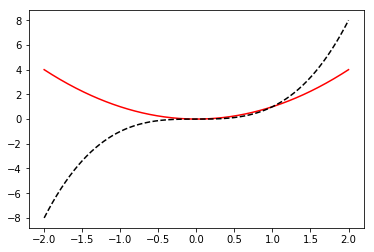

In [12]:
import numpy as np
x = np.linspace(-2, 2, 500)
y2 = x**2
y3 = x**3
plt.plot(x,y2,'r-',x,y3,'k--')
plt.show()

Or simply call `plot` multiple times before calling `show`.

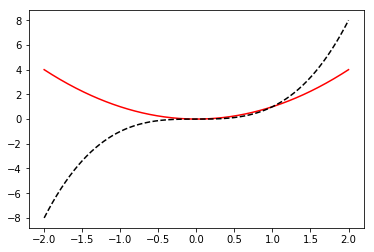

In [13]:
plt.plot(x,y2,'r-')
plt.plot(x,y3,'k--')
plt.show()

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.
Check out [the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style & color options.

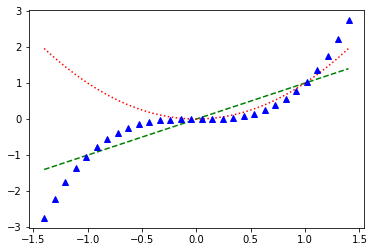

In [14]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

# Saving a figure
Saving a figure to disk is as simple as calling [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

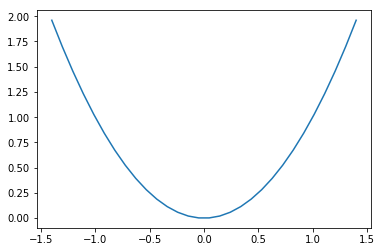

In [15]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)

# Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.


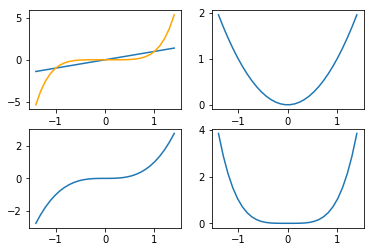

In [19]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
reference=plt.gca() # Reference to subplot in the top left
plt.plot(x, x) # Plot a line
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2) # Plot a square function
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3) # Plot a cubic function
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4) # Plot a 4 degree polynomial
plt.subplot(reference) # Make subplot in the top left active again
plt.plot(x, x**5,color='orange') # Plot a 5 degree polynomial in the top left subplot using orange color
plt.show()


* Note that `subplot(223)` is a shorthand for `subplot(2, 2, 3)`.

# Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates `figure(1)` automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()`), and the active subplot of that figure becomes the current subplot.

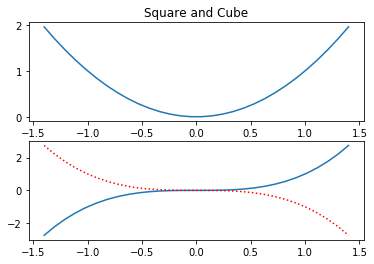

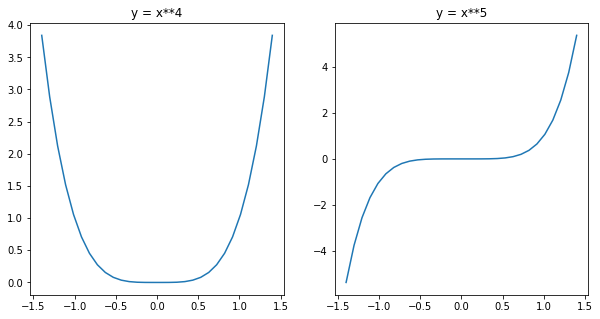

In [23]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()


# `Pylab` *vs* `Pyplot` *vs* `Matplotlib`

There is some confusion around the relationship between `pylab`, `pyplot` and `matplotlib`. It's simple: `matplotlib` is the full library, it contains everything including `pylab` and `pyplot`.

`Pyplot` provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library.

`Pylab` is a convenience module that imports `matplotlib.pyplot` and `NumPy` in a single name space. You will find many examples using `pylab`, but it is no longer recommended (because *explicit* imports are better than *implicit* ones).

# Drawing text
You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.  Any text in matplotlib may contain TeX equation expressions, see [the documentation](http://matplotlib.org/users/mathtext.html) for more details.

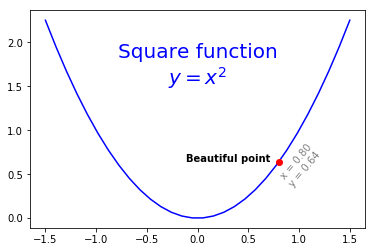

In [24]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

Just for fun, if you want an [xkcd](http://xkcd.com)-style plot, just draw within a `with plt.xkcd()` section:

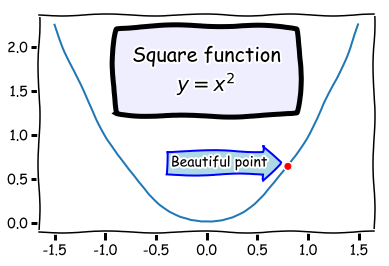

In [25]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

# Legends
The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

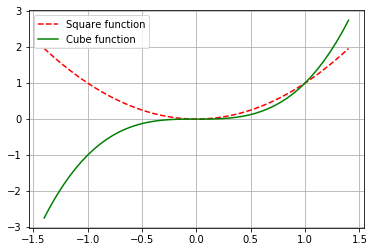

In [26]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Non linear scales
Matplotlib supports non linear scales, such as logarithmic or logit scales. We can plot the same function, $y=x^2$, in linear and logarithmic scales to see the difference between the two. 

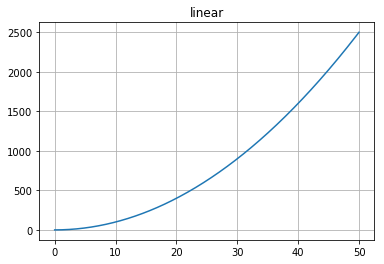

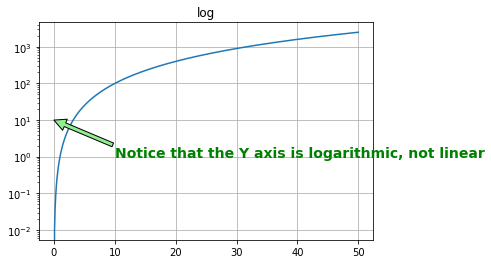

In [45]:
x = np.linspace(0, 50, 500)
# y = x**3/np.exp(2*x)
y= x**2

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.annotate("Notice that the Y axis is logarithmic, not linear", xy=(0, 10), xytext=(10,1),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})

plt.show()

# 3D Plots

Plotting 3D graphs is quite straightforward. You need to import `Axes3D`, which registers the `"3d"` projection. Then create a subplot setting the `projection` to `"3d"`. This returns an `Axes3DSubplot` object, which you can use to call `plot_surface`, giving x, y, and z coordinates, plus optional attributes.

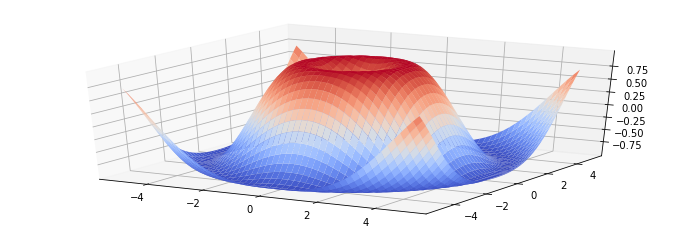

In [27]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()


We can also change the position of the camera before rendering the plot by adjusting the elevation and the azimuth angle that you use to view the 3D plot

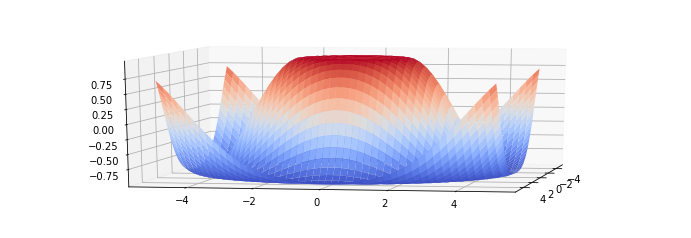

In [71]:
figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
subplot3d.view_init(elev=10, azim=10)
plt.show()

Another way to display this same data is *via* a contour plot, with the 3rd dimension color-coded.

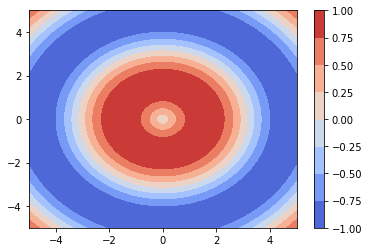

In [28]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

# Scatter plot

To draw a scatter plot, simply provide the x and y coordinates of the points.

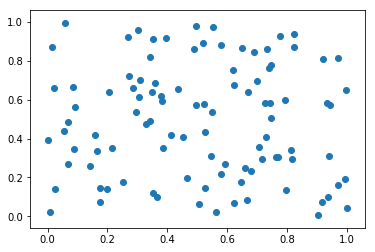

In [29]:
from numpy.random import rand
x = rand(1, 100) #Array with hundred random numbers
y = rand(1, 100) #Array with hundred random numbers
plt.scatter(x, y)
plt.show()

And as usual there are a number of other attributes you can set, such as the size of points, the fill and edge colors and the alpha level.

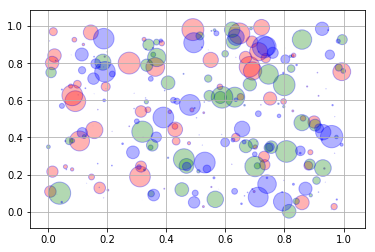

In [39]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()


# Lines
You can draw lines simply using the `plot` function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the `hlines` and `vlines` functions that plot horizontal and vertical line segments.
For example:

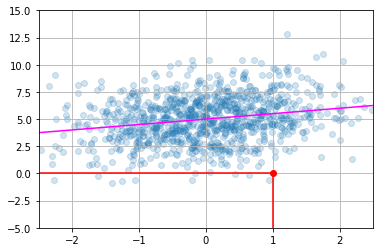

In [32]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

# Histograms

A histogram is a type of graph that has wide applications in statistics. Histograms provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values. Drawing histograms with `matplotlib` is easy:

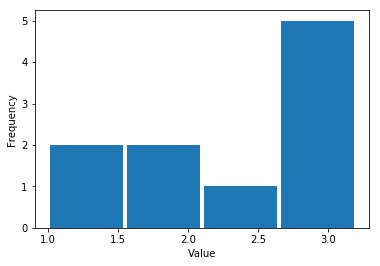

In [38]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.hist(data, bins = 4,rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()